<a href="https://colab.research.google.com/github/inhoblock/Data_science-Study/blob/main/Chapter3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3_1

K - Nearest Neighbors Regression


# Data  입력

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

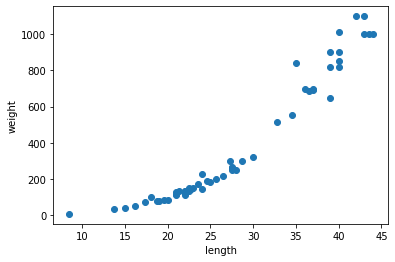

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# Training set, Test set 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# K - Nearest Neighbors Regresson 훈련 및 결정계수($ R^2$)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

# regression 의 경우 score는 결정계수를 반환함
print(knr.score(test_input, test_target))

0.9928094061010639


회귀 모델 평가 점수로 사용되는 결정계수 ($R^2$)이 의미하는 바는 다음과 같다.

회귀로 예측하는 것이 회귀 없이 평균으로만 예측한 것에 비해 얼마만큼 정확한가?

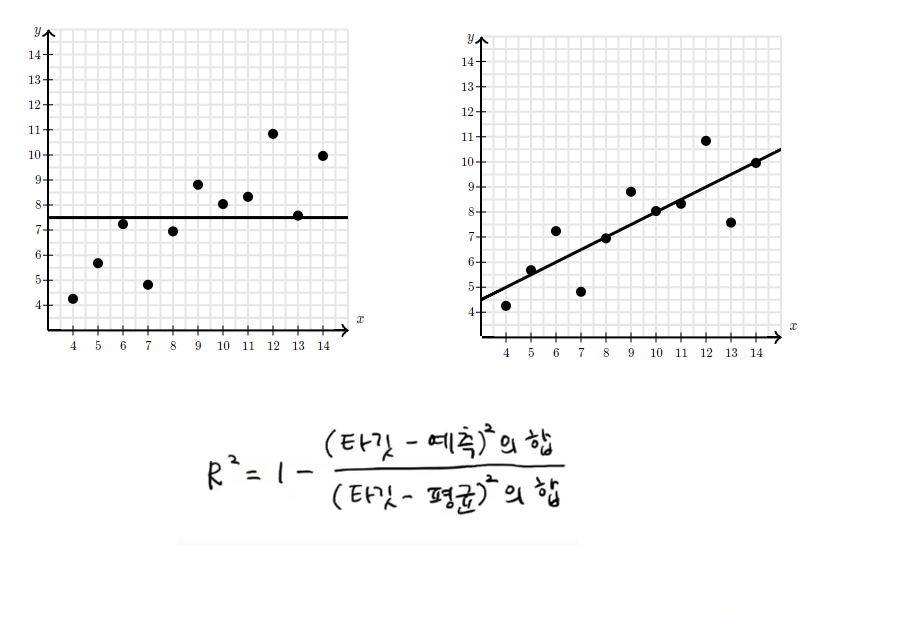



# 과대적합 VS 과소적합
 ( over - fitting VS under - fitting )

In [ ]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099255
0.9928094061010639


train set의 정확도보다 test set의 정확도가 더 높음 (과소적합)

이를 해결하고 평균 절댓값 오차를 비교해보자



 - 수정 전 평균 절댓값 오차

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


KNR 모델에서 이웃의 개수를 3으로 설정

In [ ]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.974645996398761


과소적합이 해결되었다.

In [ ]:
test_prediction = knr.predict(test_input)

mae_after = mean_absolute_error(test_target, test_prediction)

print(mae)
print(mae_after)

19.157142857142862
35.42380952380951


그러나 평균 절댓값 오차를 비교해보니 오히려 증가했다.

이를 해결하기 위해서는 이웃의 갯수 n의 최적값을 찾아야 한다.

이는 Chapter 3_3에서 알아보도록 하자.

**본 내용은 혼자 공부하는 머신러닝 + 딥러닝 (박해선) 책에 나오는 실습 예제 입니다.**